In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd. read_csv('DATA/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


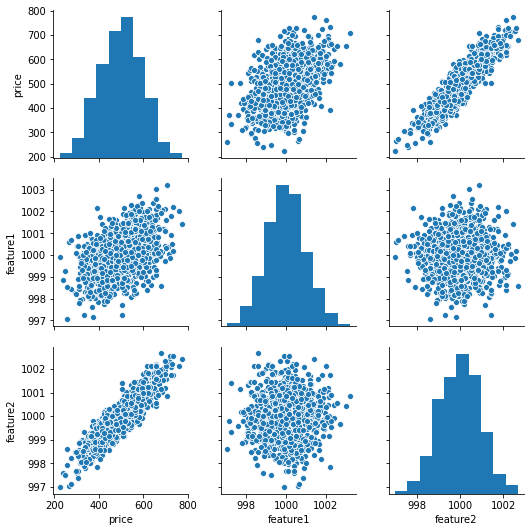

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.shape

(1000, 3)

In [9]:
X= df[['feature1','feature2']].values

In [10]:
y= df['price'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
X_train = scaler.transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


In [40]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [42]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
670/670 [==============================] - 1s 761us/sample - loss: 256511.5322
Epoch 2/250
670/670 [==============================] - 0s 52us/sample - loss: 256344.7467
Epoch 3/250
670/670 [==============================] - 0s 46us/sample - loss: 256167.4434
Epoch 4/250
670/670 [==============================] - 0s 63us/sample - loss: 255961.9656
Epoch 5/250
670/670 [==============================] - 0s 60us/sample - loss: 255721.5574
Epoch 6/250
670/670 [==============================] - 0s 45us/sample - loss: 255440.5417
Epoch 7/250
670/670 [==============================] - 0s 54us/sample - loss: 255111.3615
Epoch 8/250
670/670 [==============================] - 0s 54us/sample - loss: 254725.5023
Epoch 9/250
670/670 [==============================] - 0s 83us/sample - loss: 254274.4879
Epoch 10/250
670/670 [==============================] - 0s 51us/sample - loss: 253754.9622
Epoch 11/250
670/670 [==============================] - 0s 57us/sample - loss: 253160.2773
Epoch 1

670/670 [==============================] - 0s 40us/sample - loss: 932.7673
Epoch 92/250
670/670 [==============================] - 0s 55us/sample - loss: 908.2789
Epoch 93/250
670/670 [==============================] - 0s 45us/sample - loss: 882.3839
Epoch 94/250
670/670 [==============================] - 0s 37us/sample - loss: 852.5835
Epoch 95/250
670/670 [==============================] - 0s 39us/sample - loss: 829.3710
Epoch 96/250
670/670 [==============================] - 0s 49us/sample - loss: 805.2837
Epoch 97/250
670/670 [==============================] - 0s 38us/sample - loss: 779.2993
Epoch 98/250
670/670 [==============================] - 0s 42us/sample - loss: 760.7421
Epoch 99/250
670/670 [==============================] - 0s 47us/sample - loss: 739.0721
Epoch 100/250
670/670 [==============================] - 0s 60us/sample - loss: 716.5232
Epoch 101/250
670/670 [==============================] - 0s 33us/sample - loss: 694.4843
Epoch 102/250
670/670 [====================

670/670 [==============================] - 0s 49us/sample - loss: 24.5348
Epoch 184/250
670/670 [==============================] - 0s 38us/sample - loss: 25.0535
Epoch 185/250
670/670 [==============================] - 0s 49us/sample - loss: 24.9916
Epoch 186/250
670/670 [==============================] - 0s 42us/sample - loss: 24.8161
Epoch 187/250
670/670 [==============================] - 0s 41us/sample - loss: 25.1190
Epoch 188/250
670/670 [==============================] - 0s 44us/sample - loss: 25.0327
Epoch 189/250
670/670 [==============================] - 0s 47us/sample - loss: 24.3156
Epoch 190/250
670/670 [==============================] - 0s 42us/sample - loss: 24.5843
Epoch 191/250
670/670 [==============================] - 0s 37us/sample - loss: 24.7658
Epoch 192/250
670/670 [==============================] - 0s 52us/sample - loss: 24.7057
Epoch 193/250
670/670 [==============================] - 0s 40us/sample - loss: 24.4110
Epoch 194/250
670/670 [=======================

In [44]:
loss=pd.DataFrame(model.history.history)

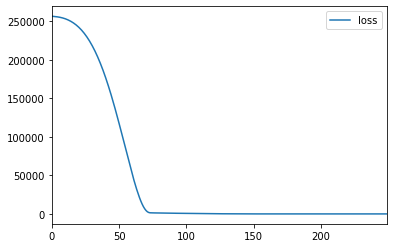

In [45]:
loss.plot()

In [46]:
model.evaluate(X_test,y_test,verbose=0)

24.27339753815622

In [47]:
model.evaluate(X_train,y_train,verbose=0)

24.127484990589654

In [48]:
pred= model.predict(X_test)

In [50]:
pred=pd.Series(pred.reshape(330,))

In [52]:
pred_df = pd.DataFrame(y_test,columns=['True y'])

In [53]:
pred_df = pd.concat([pred_df,pred],axis=1)

In [55]:
pred_df.columns=['True y','Prediction']

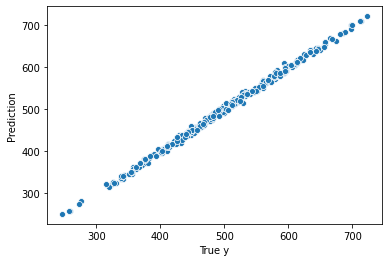

In [56]:
sns.scatterplot(x='True y',y='Prediction',data=pred_df)

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mean_absolute_error(pred_df['True y'],pred_df['Prediction'])

3.945638669966273

In [60]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [61]:
new_gem=[[998,1000]]

In [64]:
new_gem=scaler.transform(new_gem)

In [65]:
model.predict(new_gem)

array([[419.54193]], dtype=float32)

In [66]:
from tensorflow.keras.models import load_model

In [67]:
model.save('my_gem_model.h5')

In [68]:
later_model = load_model('my_gem_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
